# Entrenamiento con datos de entrenamiento
<hr>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [3]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
pipe = Pipeline([
    ('pca', PCA()),
    ('DT', DecisionTreeClassifier())
])

In [7]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'DT__criterion': ["gini", "entropy"],
    'DT__max_depth': [10, 20, 30, 40, 50],
    'DT__max_features': ['sqrt', "log2"]
}

In [8]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=sqrt, pca__n_components=314; total time=   1.0s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=sqrt, pca__n_components=314; total time=   1.0s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=sqrt, pca__n_components=314; total time=   1.0s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=sqrt, pca__n_components=314; total time=   1.0s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=sqrt, pca__n_components=314; total time=   1.0s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=log2, pca__n_components=314; total time=   0.9s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=log2, pca__n_components=314; total time=   1.2s
[CV] END DT__criterion=gini, DT__max_depth=10, DT__max_features=log2, pca__n_components=314; total time=   1.0s
[CV] END DT__criterion=gini, DT__max_depth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('DT', DecisionTreeClassifier())]),
             param_grid={'DT__criterion': ['gini', 'entropy'],
                         'DT__max_depth': [10, 20, 30, 40, 50],
                         'DT__max_features': ['sqrt', 'log2'],
                         'pca__n_components': [314]},
             scoring='accuracy', verbose=2)

In [13]:
grid_search.best_params_

{'DT__criterion': 'entropy',
 'DT__max_depth': 50,
 'DT__max_features': 'sqrt',
 'pca__n_components': 314}

In [14]:
grid_search.best_score_

0.8227381905524419

# Entrenamiento con los datos de prueba
<hr>

In [17]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', DecisionTreeClassifier(criterion="entropy", max_depth=50, max_features="sqrt"))
])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc',
                 DecisionTreeClassifier(criterion='entropy', max_depth=50,
                                        max_features='sqrt'))])

# Resultados del modelo
<hr>

In [19]:
y_predicha = pipe.predict(X_test)

In [20]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.832
Recall 0.832
precision 0.831
f1 0.831


In [21]:
y_entrenamiento = pipe.predict(X_train)

In [22]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.96
Recall 0.96
precision 1.0
f1 0.96


# Confusion Matrix
<hr>

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

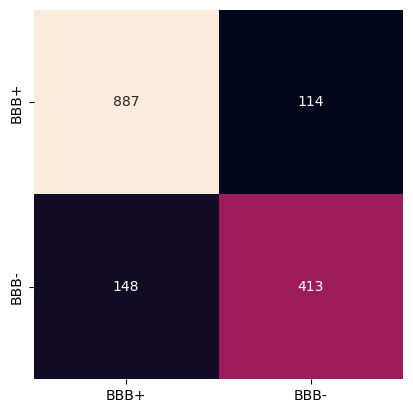

In [25]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [26]:
import joblib

In [27]:
joblib.dump(pipe, '../Guardado de modelos/modelo_DT.joblib')

['../Guardado de modelos/modelo_DT.joblib']